![Credit card being held in hand](credit_card.jpg)

Commercial banks receive _a lot_ of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report, for example. Manually analyzing these applications is mundane, error-prone, and time-consuming (and time is money!). Luckily, this task can be automated with the power of machine learning and pretty much every commercial bank does so nowadays. In this workbook, you will build an automatic credit card approval predictor using machine learning techniques, just like real banks do.

### The Data

The data is a small subset of the Credit Card Approval dataset from the UCI Machine Learning Repository showing the credit card applications a bank receives. This dataset has been loaded as a `pandas` DataFrame called `cc_apps`. The last column in the dataset is the target value.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt


# Load the dataset
cc_apps = pd.read_csv("cc_approvals.data", header=None) 
cc_apps.head()

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       678 non-null    object 
 1   1       678 non-null    float64
 2   2       690 non-null    float64
 3   3       684 non-null    object 
 4   4       684 non-null    object 
 5   5       681 non-null    object 
 6   6       681 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    int64  
 13  13      690 non-null    object 
dtypes: float64(3), int64(2), object(9)
memory usage: 75.6+ KB
None
Column 0 unique values: ['b' 'a' nan]
Column 3 unique values: ['u' 'y' nan 'l']
Column 4 unique values: ['g' 'p' nan 'gg']
Column 5 unique values: ['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' nan]
Column 6 unique values:

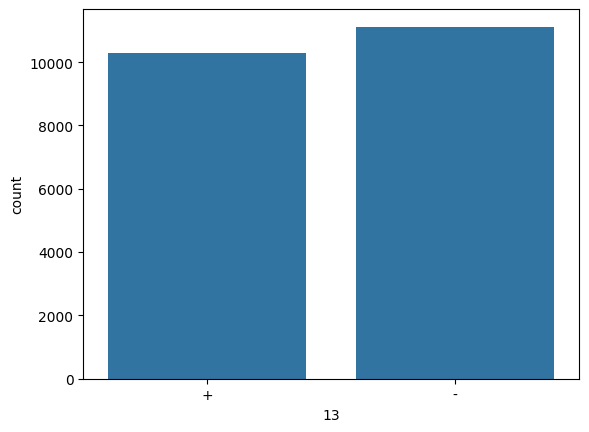

In [ ]:
# Data exploration
# Check data types
print(cc_apps.info())

# Determine if any columns have missing values labelled as something other than NaN
for i in range(len(cc_apps.columns)):
    if cc_apps[i].dtype == 'object':
        print(f"Column {i} unique values: {cc_apps[i].unique()}")

# Replace '?' with NaN
cc_apps = cc_apps.replace('?', np.nan)

# Convert column '1' to float
cc_apps[1] = cc_apps[1].astype('float')

# Check data types and number of missing values
print(cc_apps.info())


# View summary statistics for numerical columns
print(cc_apps.describe())
print(cc_apps.shape)

# Split the columns into categorical and numerical columns
categorical_cols = cc_apps.select_dtypes(include=['object']).columns.tolist()
numerical_cols = cc_apps.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Check unique values in categorical columns
for col in cc_apps[categorical_cols]:
    print (cc_apps[col].value_counts())


# View target column distribution
sns.countplot(x= cc_apps[13], data=cc_apps)
plt.show()
